In [231]:
import pathlib
import pickle
import requests
import zipfile
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data


In [233]:
DATA_DIR.mkdir(parents=True, exist_ok=True)

In [234]:
raw_data_dir = DATA_DIR / 'raw'
raw_data_dir.mkdir(parents=True, exist_ok=True)
print(raw_data_dir)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data\raw


In [235]:
raw_data_file_path = DATA_DIR / 'raw' / 'glaucoma_dataset.csv'
print(raw_data_file_path)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data\raw\glaucoma_dataset.csv


In [236]:
filesize = raw_data_file_path.stat().st_size
print(f'This file has {filesize} bytes')

This file has 3380533 bytes


In [237]:
raw_data = pd.read_csv(raw_data_file_path)

In [238]:
raw_data.shape

(10000, 17)

In [239]:
raw_data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


In [240]:
data = raw_data.copy()

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [242]:
data.dtypes.value_counts()

object     12
float64     3
int64       2
Name: count, dtype: int64

In [243]:
medications = set()
for item in data['Medication Usage']:
    try:
        medications.update(item.split(', '))
    except AttributeError:
        pass


In [244]:
medications

{'Amoxicillin',
 'Aspirin',
 'Atorvastatin',
 'Ibuprofen',
 'Lisinopril',
 'Metformin',
 'Omeprazole'}

In [245]:
medical_history = set()
for item in data['Medical History']:
    try:
        medical_history.update(item.split(', '))
    except AttributeError:
        pass

In [246]:
medical_history

{'Diabetes', 'Glaucoma in family', 'Hypertension'}

Trocando dados faltantes por None

In [247]:
data['Medication Usage'].fillna('None', inplace=True)
data['Medical History'].fillna('None', inplace=True)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            10000 non-null  object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

Separando a feature "Medication Usage" em features booleanas

In [249]:
for item in medications:
    data[item] = data['Medication Usage'].str.contains(item).astype('category')

data = data.drop('Medication Usage', axis=1)

In [250]:
visual_symptoms = set()
for item in data['Visual Symptoms']:
    try:
        visual_symptoms.update(item.split(', '))
    except AttributeError:
        pass

In [251]:
visual_symptoms

{'Blurred vision',
 'Eye pain',
 'Halos around lights',
 'Nausea',
 'Redness in the eye',
 'Tunnel vision',
 'Vision loss',
 'Vomiting'}

In [252]:
#Cria uma coluna para cada sintoma visual e preenche com True ou False
for item in visual_symptoms:
    data[item] = data['Visual Symptoms'].str.contains(item).astype('category')

data = data.drop('Visual Symptoms', axis=1)

In [253]:
data['Glaucoma Type'].value_counts()

Glaucoma Type
Juvenile Glaucoma              1734
Normal-Tension Glaucoma        1699
Primary Open-Angle Glaucoma    1668
Secondary Glaucoma             1657
Congenital Glaucoma            1641
Angle-Closure Glaucoma         1601
Name: count, dtype: int64

Separando a coluna "Visual Field Test Results" em "VFTR Sensitivity" e "VFTR Specificity"

In [254]:
#Separa a coluna 'Visual Field Test Results' em "VFTR Sensitivity" e "VFTR Specificity"
data[['VFTR Sensitivity', 'VFTR Specificity']] = data['Visual Field Test Results'].str.split(',', expand=True)
data['VFTR Sensitivity'] = data['VFTR Sensitivity'].str.replace('Sensitivity: ', '').astype(float)
data['VFTR Specificity'] = data['VFTR Specificity'].str.replace('Specificity: ', '').astype(float)
data = data.drop('Visual Field Test Results', axis=1)

In [255]:
for item in data["Optical Coherence Tomography (OCT) Results"]:
    print(item)
    break

RNFL Thickness: 86.48 µm, GCC Thickness: 64.14 µm, Retinal Volume: 5.63 mm³, Macular Thickness: 283.67 µm


Separando a coluna "Optical Coherence Tomography (OCT) Results" em "RNFL Thickness", "GCC Thickness", "Retinal Volume" e "Macular Thickness"

In [256]:
data[['RNFL Thickness', 'GCC Thickness', 'Retinal Volume', 'Macular Thickness']] = data['Optical Coherence Tomography (OCT) Results'].str.split(',', expand=True)

data['RNFL Thickness'] = data['RNFL Thickness'].str.replace('RNFL Thickness: ', '')
data['RNFL Thickness'] = data['RNFL Thickness'].str.replace('µm', '').astype(float)
data['GCC Thickness'] = data['GCC Thickness'].str.replace('GCC Thickness: ', '')
data['GCC Thickness'] = data['GCC Thickness'].str.replace('µm', '').astype(float)
data['Retinal Volume'] = data['Retinal Volume'].str.replace('Retinal Volume: ', '')
data['Retinal Volume'] = data['Retinal Volume'].str.replace('mm³', '').astype(float)
data['Macular Thickness'] = data['Macular Thickness'].str.replace('Macular Thickness: ', '')
data['Macular Thickness'] = data['Macular Thickness'].str.replace('µm', '').astype(float)

data = data.drop('Optical Coherence Tomography (OCT) Results', axis=1)

In [257]:
data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Pachymetry,Cataract Status,...,Vision loss,Eye pain,Vomiting,Halos around lights,VFTR Sensitivity,VFTR Specificity,RNFL Thickness,GCC Thickness,Retinal Volume,Macular Thickness
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,541.51,Present,...,False,True,False,False,0.54,0.75,86.48,64.14,5.63,283.67
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,552.77,Absent,...,True,False,False,False,0.72,0.88,96.88,56.48,5.69,261.48
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,573.65,Absent,...,True,False,False,True,0.56,0.80,89.81,59.05,5.96,282.34
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,None,590.67,Absent,...,False,False,False,True,0.60,0.93,87.25,63.98,6.44,262.86
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,588.41,Absent,...,False,True,False,False,0.82,0.90,82.61,66.01,6.16,261.78


In [258]:
data = data.drop('Patient ID', axis=1)

In [259]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Pachymetry', 'VFTR Sensitivity', 'VFTR Specificity', 'RNFL Thickness',
       'GCC Thickness', 'Retinal Volume', 'Macular Thickness'],
      dtype='object')

In [260]:
#change dtype object to category
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

In [261]:
category_features = data.select_dtypes(include=['category'])
category_features.columns

Index(['Gender', 'Visual Acuity Measurements', 'Family History',
       'Medical History', 'Cataract Status', 'Angle Closure Status',
       'Diagnosis', 'Glaucoma Type', 'Aspirin', 'Ibuprofen', 'Omeprazole',
       'Metformin', 'Lisinopril', 'Amoxicillin', 'Atorvastatin', 'Nausea',
       'Blurred vision', 'Tunnel vision', 'Redness in the eye', 'Vision loss',
       'Eye pain', 'Vomiting', 'Halos around lights'],
      dtype='object')

In [262]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

       count     mean        std   min   25%   50%   75%   max
Age  10000.0  53.8722  21.127563  18.0  36.0  54.0  72.0  90.0


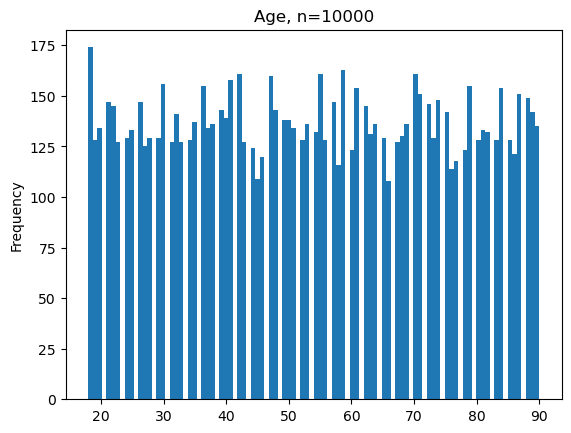

                              count       mean       std   min    25%     50%  \
Intraocular Pressure (IOP)  10000.0  17.507527  4.356101  10.0  13.76  17.485   

                             75%   max  
Intraocular Pressure (IOP)  21.3  25.0  


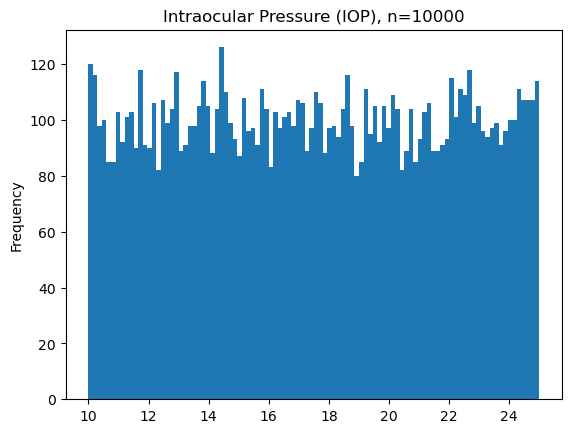

                           count      mean       std  min   25%   50%   75%  \
Cup-to-Disc Ratio (CDR)  10000.0  0.548437  0.144326  0.3  0.42  0.55  0.67   

                         max  
Cup-to-Disc Ratio (CDR)  0.8  


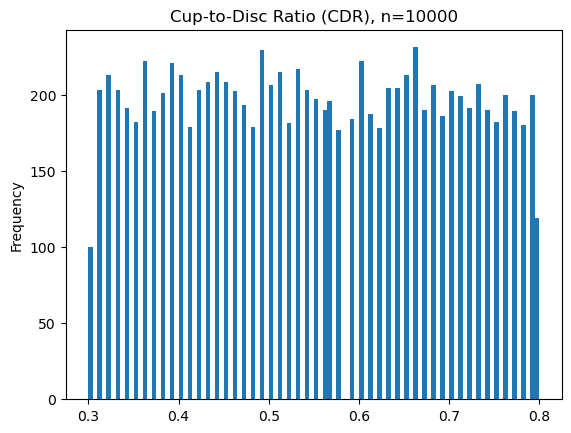

              count        mean        std     min     25%      50%       75%  \
Pachymetry  10000.0  549.733974  28.902741  500.01  524.59  549.335  574.9725   

               max  
Pachymetry  599.99  


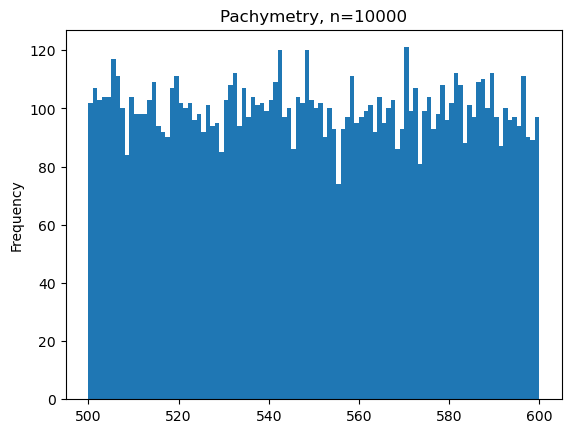

                    count      mean       std  min   25%   50%   75%  max
VFTR Sensitivity  10000.0  0.750052  0.143988  0.5  0.63  0.75  0.87  1.0


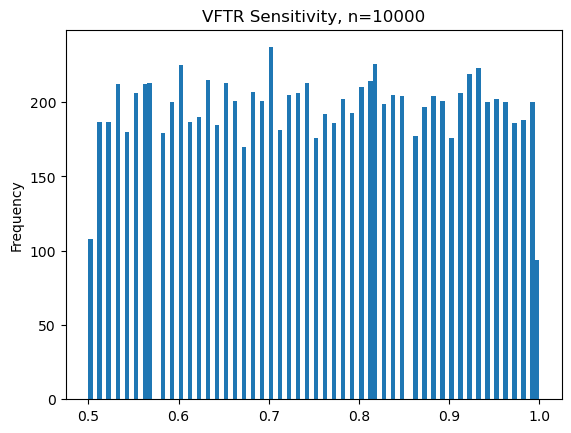

                    count      mean       std  min   25%   50%   75%  max
VFTR Specificity  10000.0  0.850237  0.086709  0.7  0.77  0.85  0.92  1.0


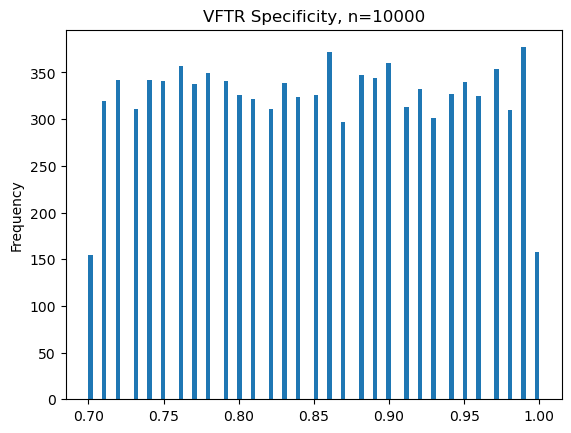

                  count       mean       std    min    25%    50%    75%  \
RNFL Thickness  10000.0  87.433765  7.176537  75.01  81.28  87.38  93.64   

                  max  
RNFL Thickness  100.0  


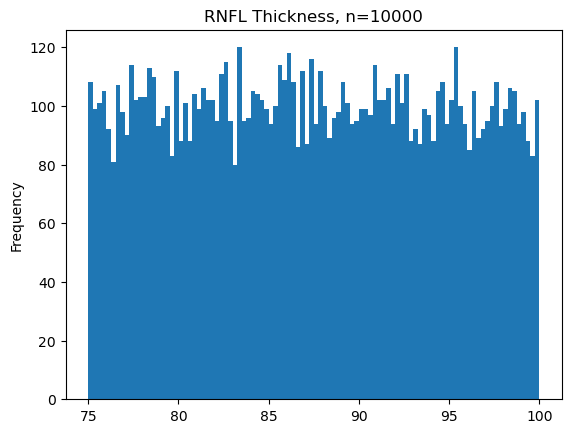

                 count       mean       std   min    25%    50%    75%   max
GCC Thickness  10000.0  62.514676  4.333931  55.0  58.82  62.52  66.24  70.0


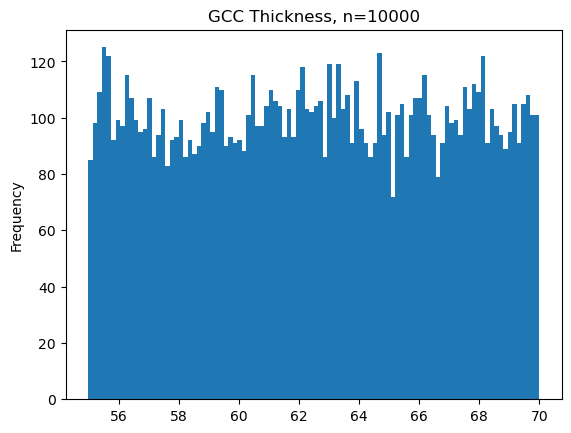

                  count      mean       std  min   25%  50%   75%  max
Retinal Volume  10000.0  6.000813  0.289753  5.5  5.75  6.0  6.25  6.5


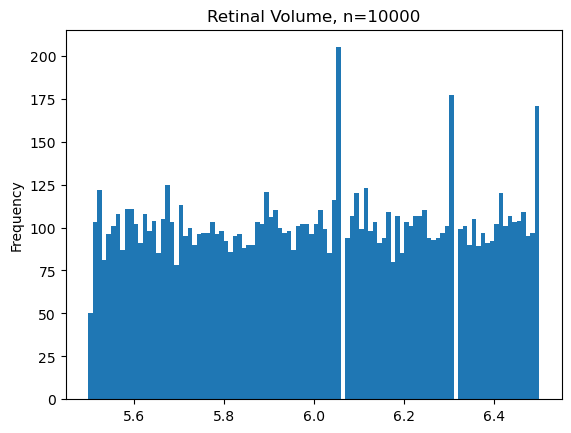

                     count        mean       std    min     25%     50%  \
Macular Thickness  10000.0  275.038068  8.714535  260.0  267.37  275.13   

                      75%    max  
Macular Thickness  282.65  290.0  


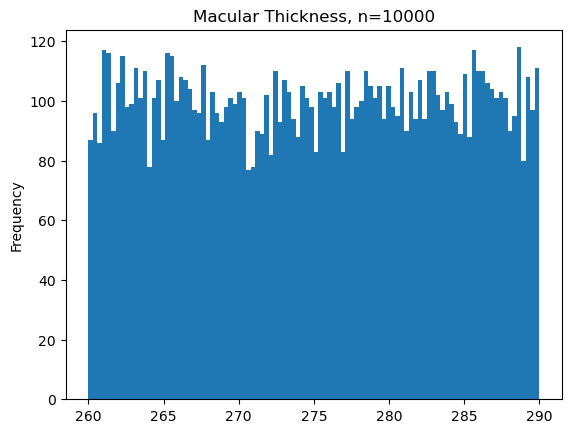

In [263]:
for col in numeric_features.columns:
    plot_numericals(data, [("{}").format(col)])

In [264]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

In [265]:
categorical_variables = category_features.columns

In [266]:
category_features

,Gender,Visual Acuity Measurements,Family History,Medical History,Cataract Status,Angle Closure Status,Diagnosis,Glaucoma Type,Aspirin,Ibuprofen,...,Amoxicillin,Atorvastatin,Nausea,Blurred vision,Tunnel vision,Redness in the eye,Vision loss,Eye pain,Vomiting,Halos around lights
0,Male,LogMAR 0.1,No,Diabetes,Present,Open,No Glaucoma,Primary Open-Angle Glaucoma,True,True,...,True,True,True,False,True,False,False,True,False,False
1,Female,LogMAR 0.1,No,Hypertension,Absent,Open,No Glaucoma,Juvenile Glaucoma,False,True,...,True,True,False,False,True,True,True,False,False,False
2,Female,20/40,No,Hypertension,Absent,Closed,No Glaucoma,Juvenile Glaucoma,True,True,...,True,True,False,False,False,True,True,False,False,True
3,Male,LogMAR 0.0,No,None,Absent,Closed,No Glaucoma,Congenital Glaucoma,True,True,...,False,False,True,False,False,False,False,False,False,True
4,Male,LogMAR 0.1,No,Diabetes,Absent,Closed,No Glaucoma,Primary Open-Angle Glaucoma,True,True,...,True,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,LogMAR 0.1,No,None,Absent,Open,Glaucoma,Normal-Tension Glaucoma,False,False,...,False,False,False,False,True,False,False,True,False,False
9996,Male,LogMAR 0.0,No,Diabetes,Absent,Open,No Glaucoma,Normal-Tension Glaucoma,False,False,...,False,False,False,False,False,False,False,True,True,True
9997,Female,20/40,Yes,Diabetes,Present,Open,No Glaucoma,Secondary Glaucoma,False,True,...,False,False,False,True,False,False,True,False,True,False
9998,Male,LogMAR 0.1,No,Glaucoma in family,Absent,Closed,Glaucoma,Normal-Tension Glaucoma,False,False,...,False,False,True,False,False,False,False,False,False,True


                            count unique                top  freq
Gender                      10000      2               Male  5029
Eye pain                    10000      2              False  6728
Vision loss                 10000      2              False  6744
Redness in the eye          10000      2              False  6780
Tunnel vision               10000      2              False  6641
Blurred vision              10000      2              False  6674
Nausea                      10000      2              False  6688
Atorvastatin                10000      2              False  5037
Amoxicillin                 10000      2               True  5067
Lisinopril                  10000      2              False  5027
Vomiting                    10000      2              False  6667
Metformin                   10000      2              False  5016
Ibuprofen                   10000      2               True  5001
Aspirin                     10000      2               True  5103
Glaucoma T

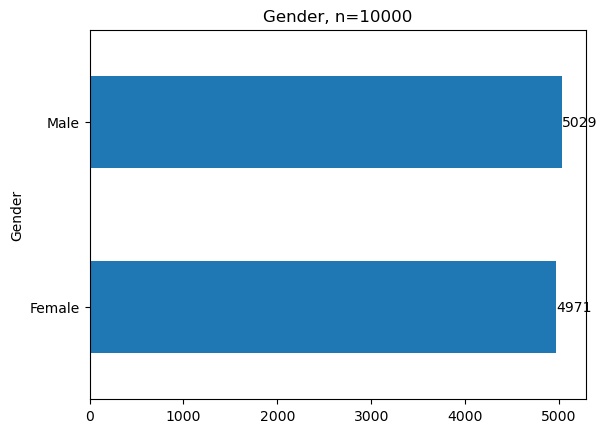

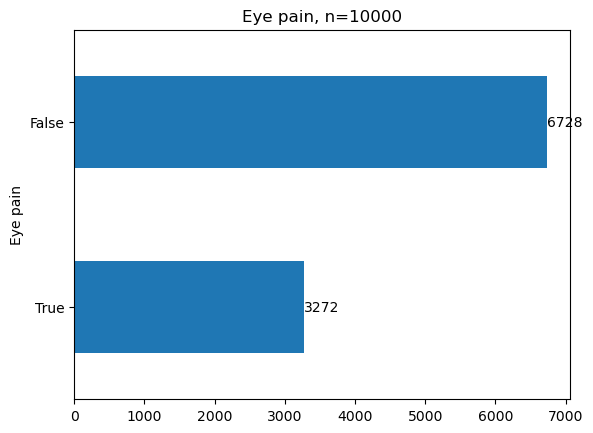

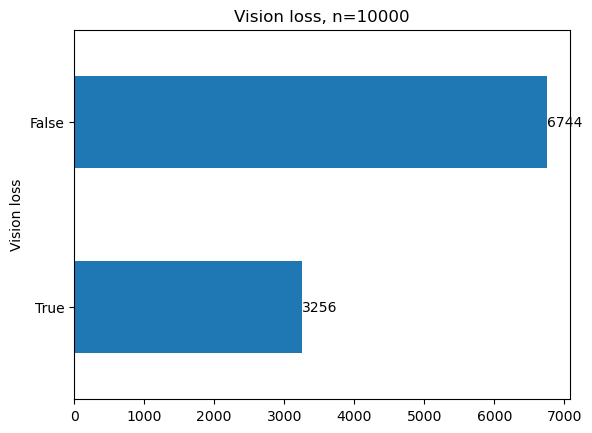

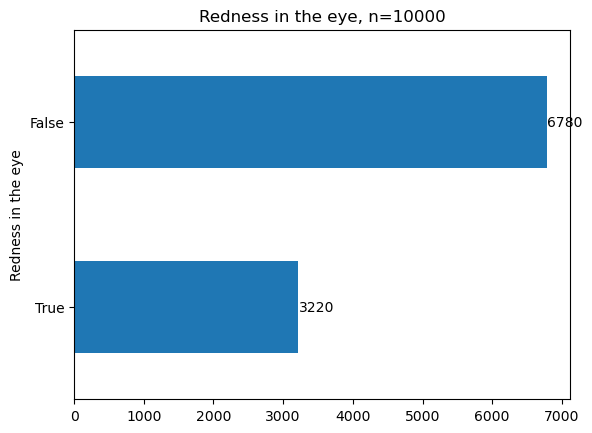

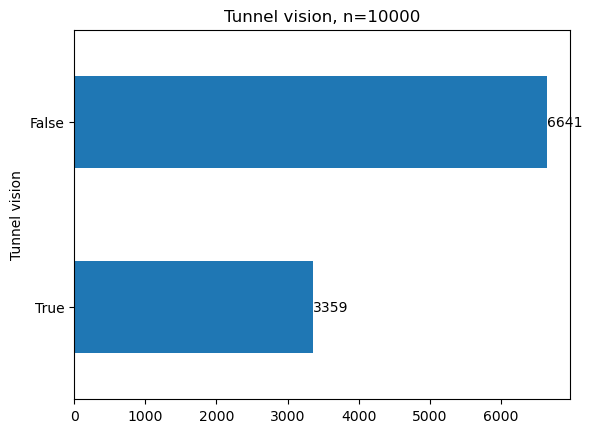

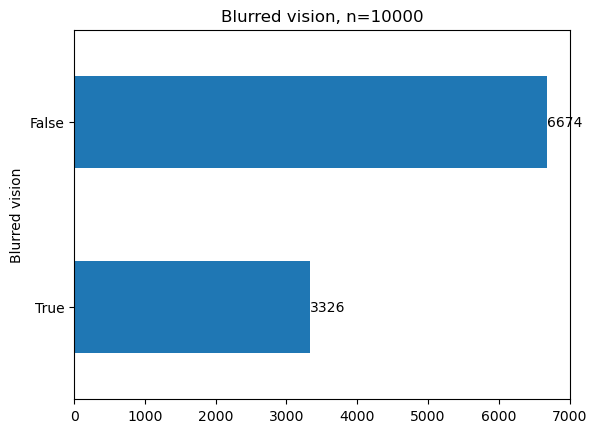

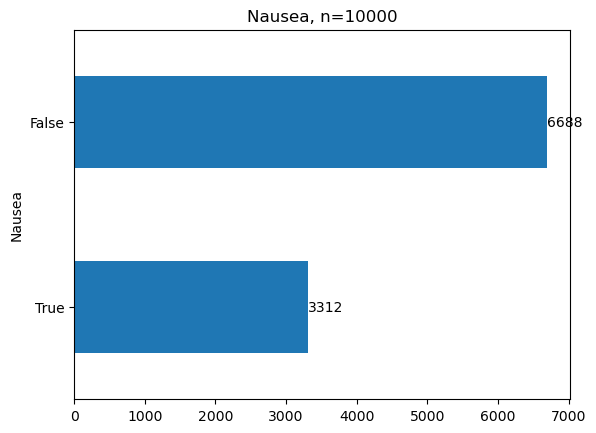

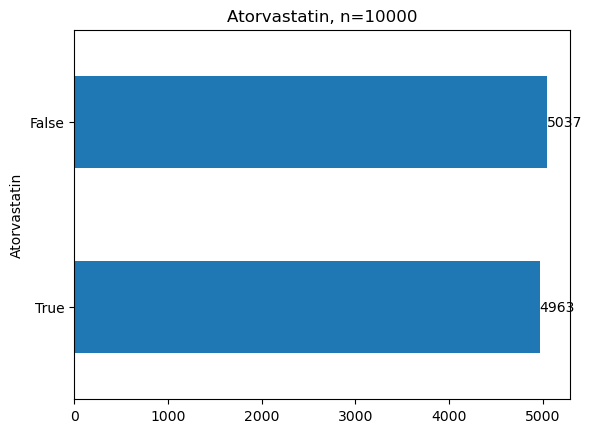

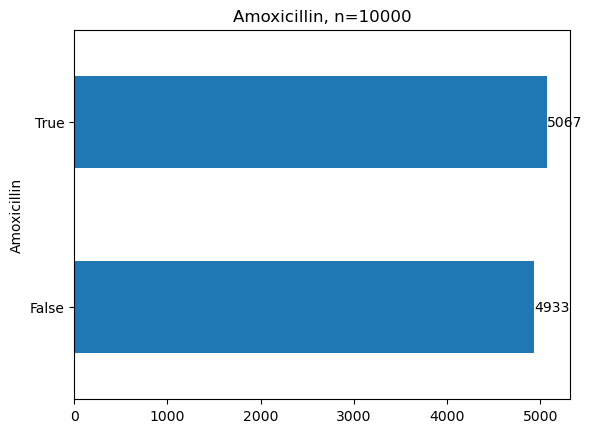

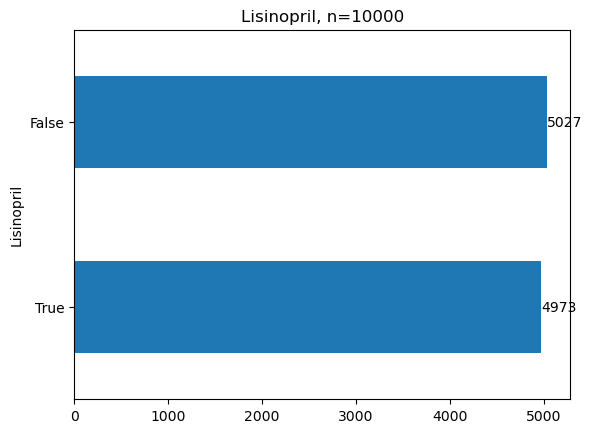

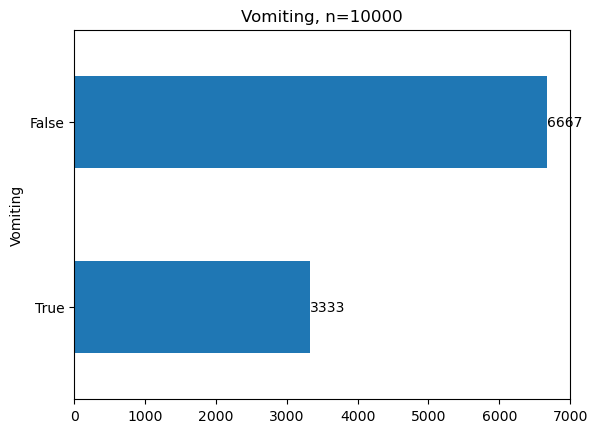

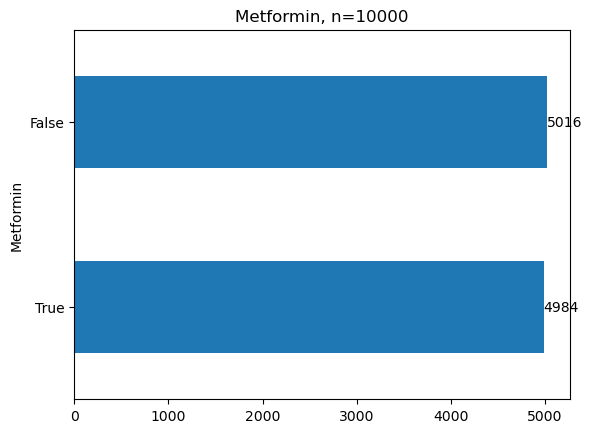

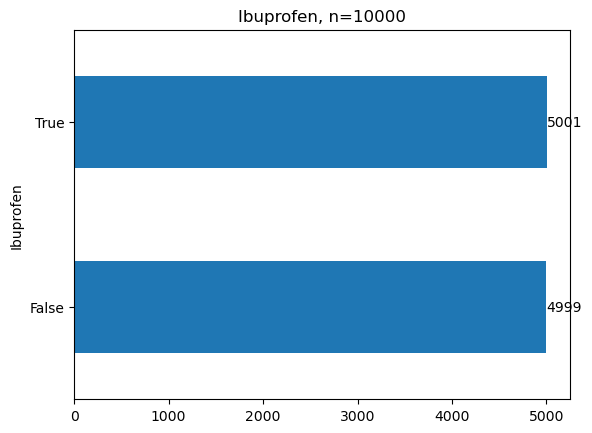

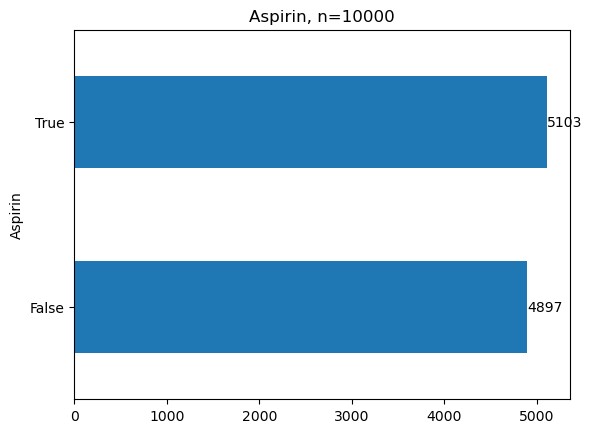

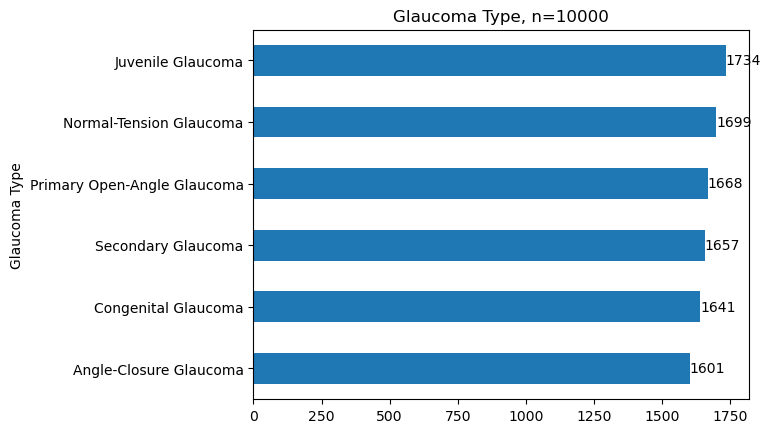

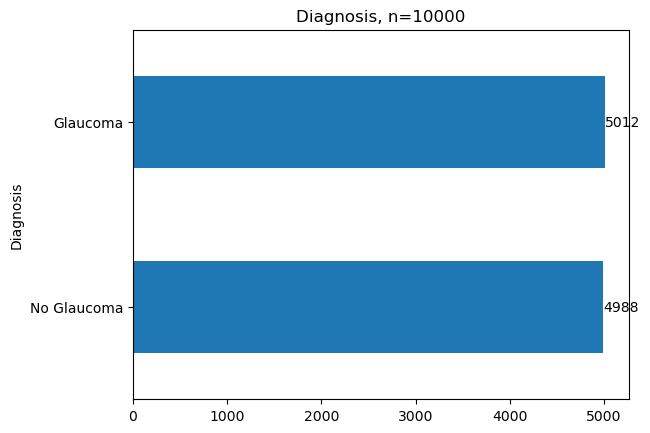

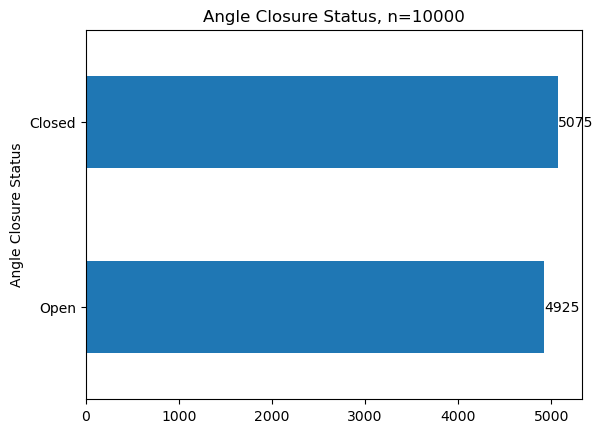

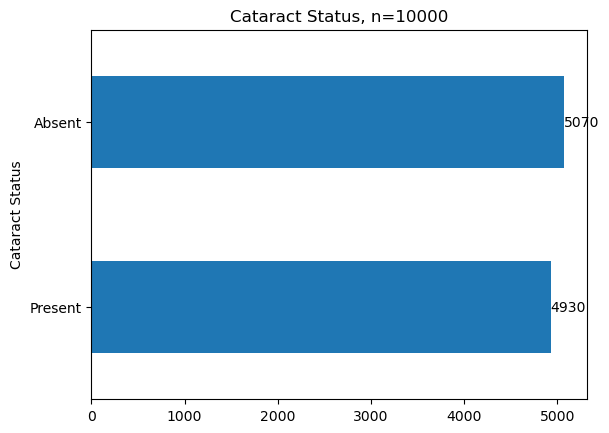

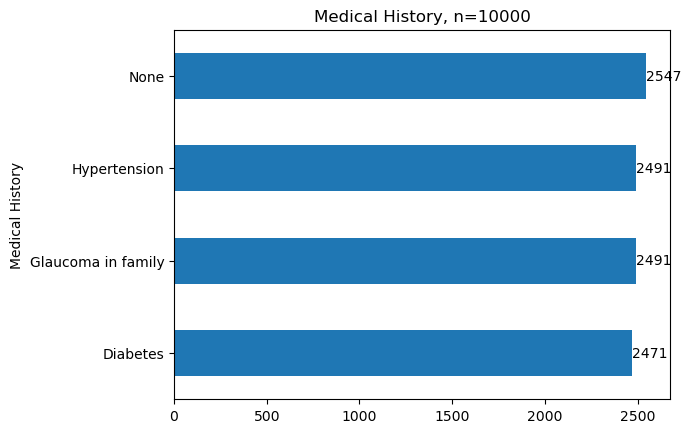

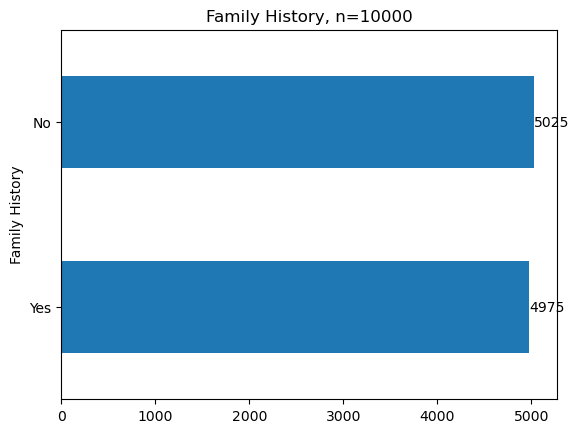

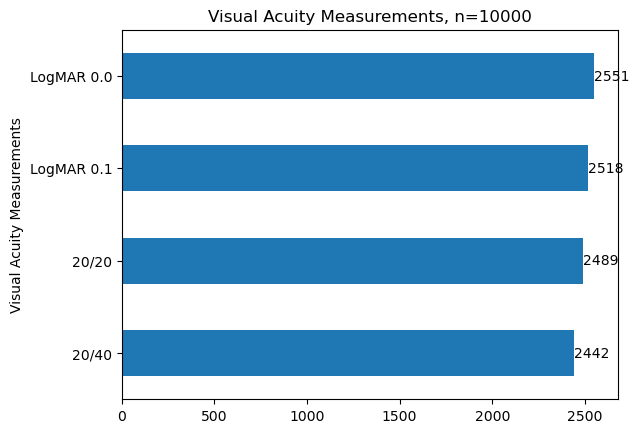

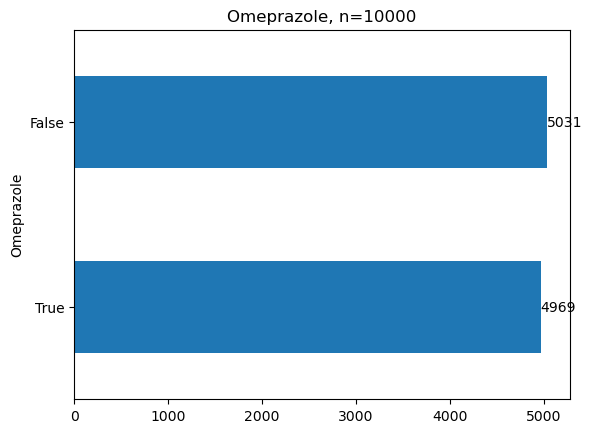

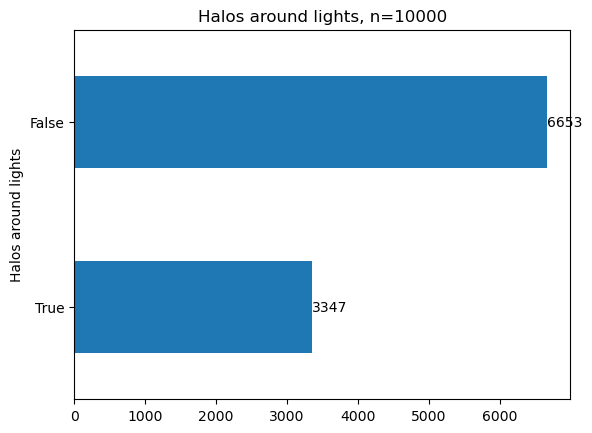

In [267]:
plot_categoricals(data, categorical_variables)

In [268]:
data['Glaucoma Type'].value_counts()

Glaucoma Type
Juvenile Glaucoma              1734
Normal-Tension Glaucoma        1699
Primary Open-Angle Glaucoma    1668
Secondary Glaucoma             1657
Congenital Glaucoma            1641
Angle-Closure Glaucoma         1601
Name: count, dtype: int64